# Bayes' Optimal Classification

Given an input feature vector **_x_** and classes Cj, the posterior probabilities **P(Cj|x)** can be calculated using Bayes’ Theorem: 

$$P(C_{j}|x) =  \frac{P(x|C_{j})*P(C_{j})}{P(x)}$$ 

and the optimal Bayesian decision under uncertainty is to select the class with the maximum Posterior probability. 
The posterior probability can be also be written as: 
$$P(C_{j}|x) =  \frac{(likelihood * prior)}{evidence}$$ 

Therefore, using Bayes’ theorem we use the observation **_x_**, to go from prior probability to posterior probability.  

Without any new information or data, the prior probabilities should be used to classify a random sample from the population. Prior distributions can be derived from data of past experiments or by discussing with domain experts. Preference is usually given to conjugate prior distributions. When the posterior and prior have same probability distribution, the prior and posterior are called conjugate distributions. For conjugate priors, the prior is chosen so that prior * likelihood is of same distribution as posterior. 

Let’s take the cancer dataset that is available as part of sklearn.

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
cancer = load_breast_cancer()

This is a binary classification problem as there are 2 classes in the dataset -- Malignant and Benign

In [3]:
list(cancer.target_names)

['malignant', 'benign']

In [4]:
data = numpy.c_[cancer.data, cancer.target]

In [5]:
columns = numpy.append(cancer.feature_names, ["target"])

The following features are present in the dataset.

In [6]:
columns

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='<U23')

In [7]:
df = pd.DataFrame(data,columns=columns)
counts = df.target.value_counts(ascending=True)

There are 212 samples for Malignant and 357 samples for Benign class

In [8]:
counts

0.0    212
1.0    357
Name: target, dtype: int64

Note:
Since we don't have access to an expert, we can assume that the data is representative of the actual population. Therefore, the prior probabilities **P(Malignant) and P(Benign)** can be determined as: 
$$P(Malignant) = 212/569 = 0.37 $$

$$P(Benign) = 357/569 = 0.63 $$

Here, The prior distributions for **P(Malignant) and P(Benign)** are assumed to be Uniform.

# Data Exploration

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


A quick look at the correlation matrix (plotted below) shows that many features are highly correlated (linearly). Highly correlated features can be removed as they necessarily do not provide any extra information gain to the model. Entropy can be used as a measure of Information Gain. Entropy of feature Y is defined as:
$$H(Y) = -\sum p(y)log_{2}(p(y))$$

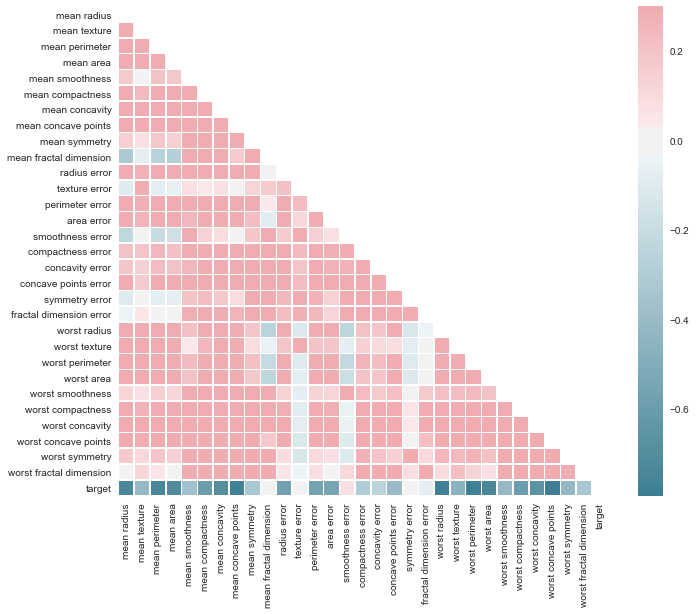

In [12]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask 

sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3, center=0,
            square=True, linewidths=.5)
plt.show()

**Distribution of Features**

Plotting the class conditional densities for a few features show that the likelihood densities can be approximated by gaussian distribution

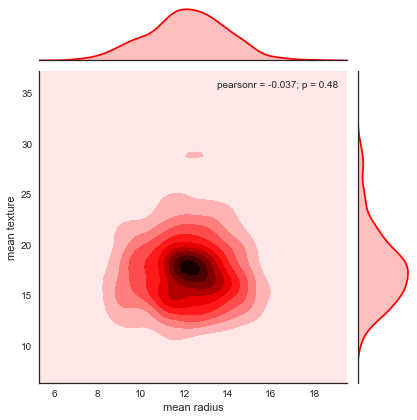

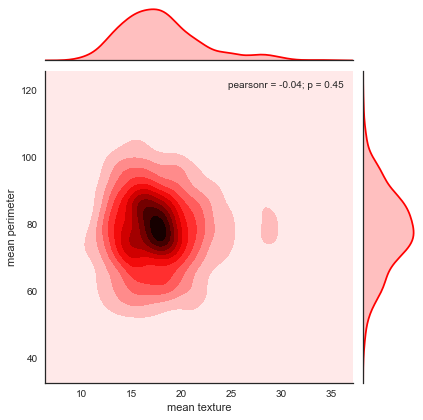

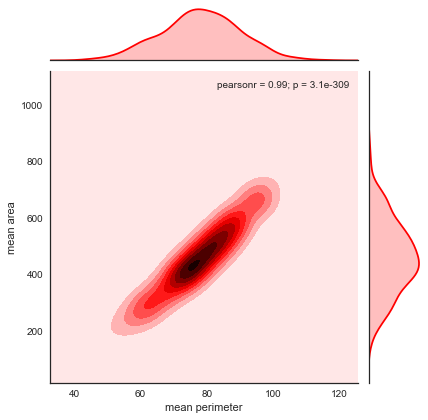

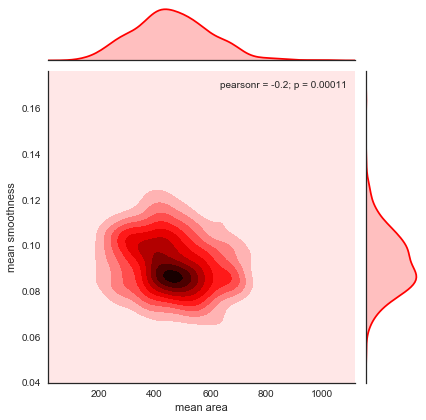

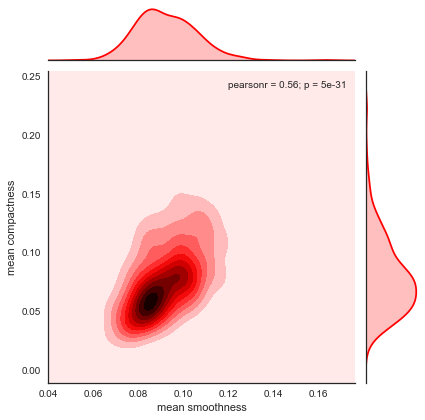

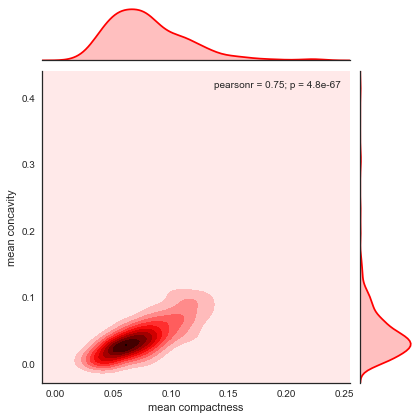

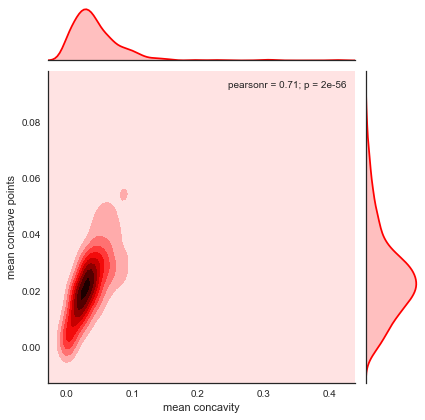

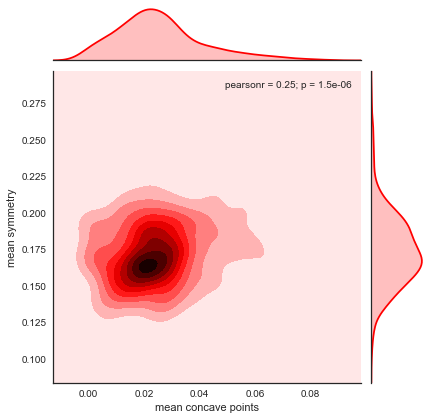

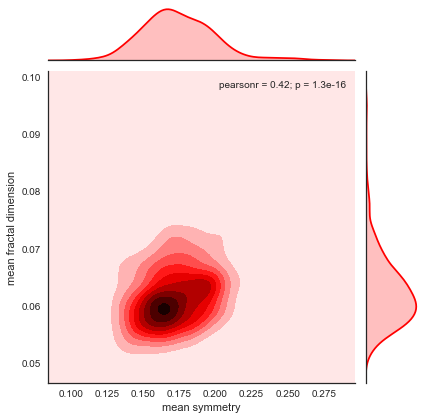

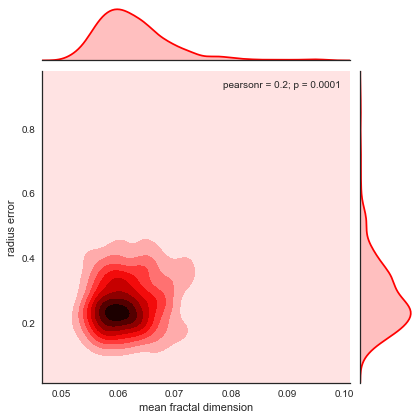

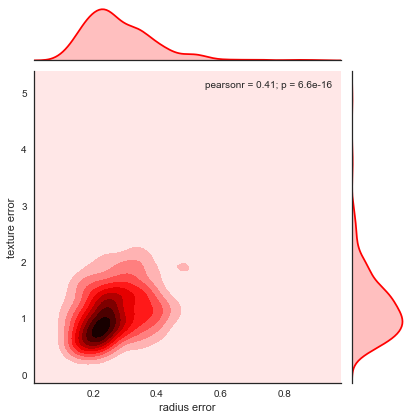

In [13]:
df_benign = df[df['target']==1]
for c in range(len(columns)-20):
    col_1 = columns[c]
    col_2 = columns[c+1]
    sns.jointplot(x=df_benign[col_1], y=df_benign[col_2], kind='kde',color='Red')

plt.show()

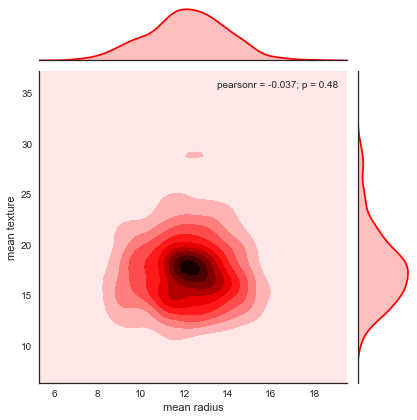

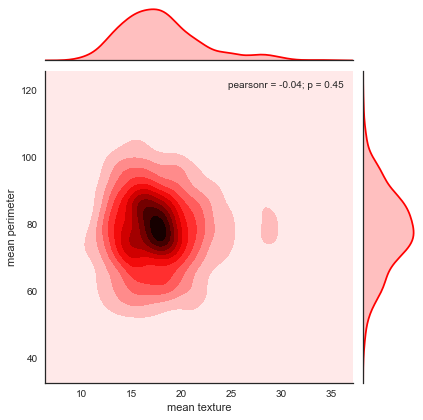

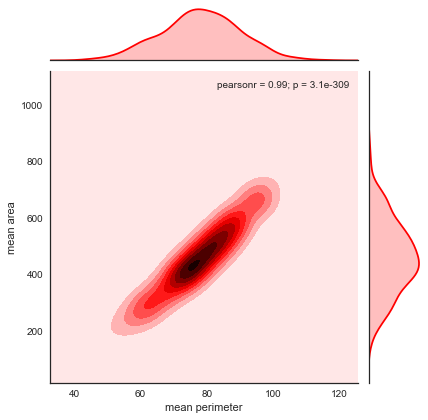

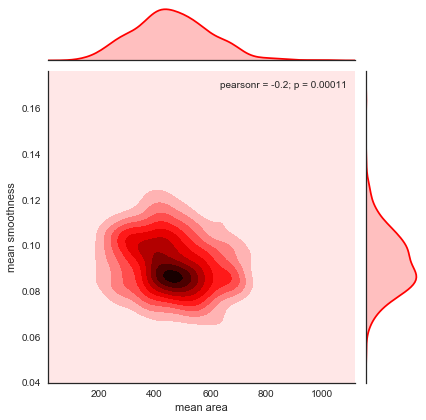

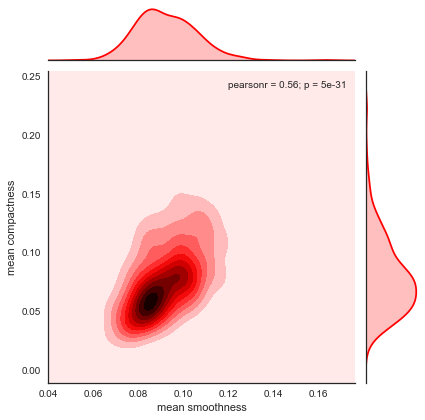

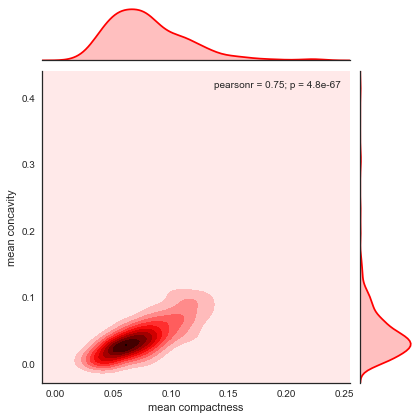

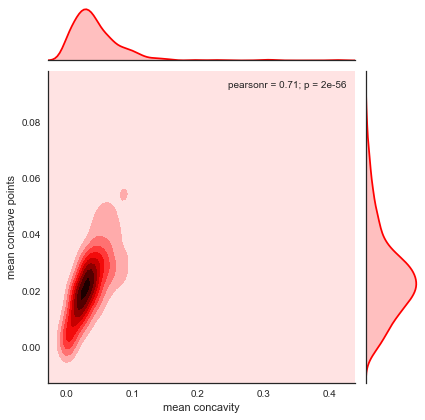

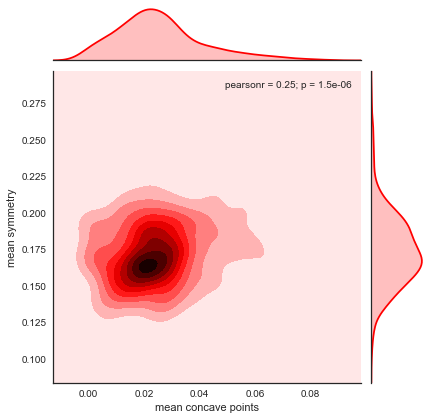

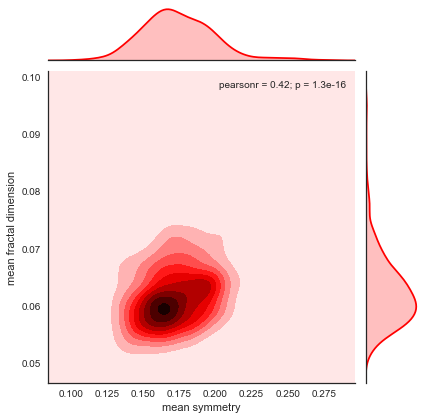

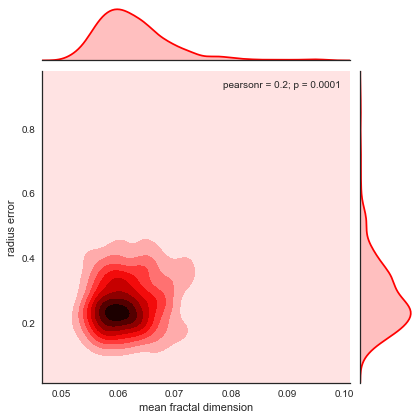

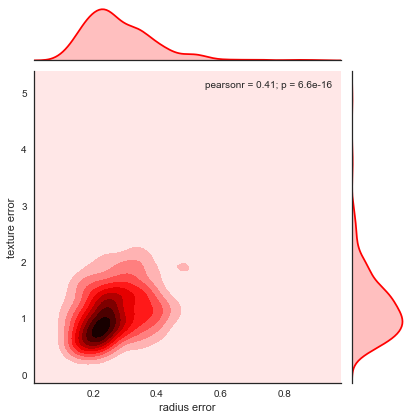

In [14]:
df_cancer = df[df['target']==1]
for c in range(len(columns)-20):
    col_1 = columns[c]
    col_2 = columns[c+1]
    sns.jointplot(x=df_cancer[col_1], y=df_cancer[col_2], kind='kde',color='Red')

plt.show()

# Model Development

**Assumptions made by Gaussian Naive Bayes**

- Likelihood of the features is Gaussian. 
- Features are independent

As discribed above, Bayes theorem is given by:
$$P(Cj|x) =  \frac{P(x|Cj)*P(Cj)}{P(x)}$$ 

where, 
- x is a multi-dimensional vector with number of dimensions = number of features = (x1, x2, ... xn)
- Since features are independent, the class conditional joint distribution is the product of class conditional marginal distributions i.e. 
$$ P(x1, x2, ... xn|Cj) = \prod\limits_{i=1}^n P(x_{i}|C_{j}) $$ 
Therefore,
$$P(Cj|x) =  \frac{\prod\limits_{i=1}^n P(x_{i}|C_{j}) *P(Cj)}{P(x)}$$ 
and each P(xi|Cj) is considered to be Gaussian and the parameters of each Gaussian are estimated using ML Estimation

**Removing correlated features**

Since Naive Byes assumes that features are independent, let's remove highly correlated features

In [50]:
corr_matrix = corr.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]

The following columns can be removed

In [51]:
to_drop

['mean perimeter', 'worst perimeter']

In [52]:
df_new = df.drop(to_drop, axis=1)

In [53]:
#Divide the dataframe into features and target
X = df_new[df_new.columns[:-1]]
Y = df_new[df_new.columns[-1]]

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=426, test_size=143, random_state=0)

In [55]:
#implement a classifier using Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Initialize our classifier
gnb = GaussianNB()
# Train our classifier
model = gnb.fit(x_train, y_train)

In [56]:
# Make predictions
yhat = gnb.predict(x_test)
yhat_prob = gnb.predict_proba(x_test)

In [86]:
yhat_prob[:5]

array([[  9.99998713e-01,   1.28714440e-06],
       [  3.18666808e-11,   1.00000000e+00],
       [  6.36402639e-13,   1.00000000e+00],
       [  1.07097098e-10,   1.00000000e+00],
       [  2.69190430e-14,   1.00000000e+00]])

# Model Evaluation

In [57]:
# Evaluate accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, yhat))

0.923076923077


So, the accuracy of the model is 92.3%

In [59]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, yhat))

             precision    recall  f1-score   support

        0.0       0.89      0.91      0.90        53
        1.0       0.94      0.93      0.94        90

avg / total       0.92      0.92      0.92       143



# Bayes Optimal Decision

In many situations, our objective is **not** to improve the accuracy of the classifier. The losses for the scenarios -  i) a patient having Cancer is incorrectly classified as healthy AND ii) A healthy patient is incorrectly diagnosed as having cancer, are very different. 

A new classifier that is less accurate than the Naive Bayes classifier, but has less mistakes of the 1st type would be preferable in this setting. 

In general, the losses associated with misclassification can be represented by a Loss matrix shown below.

<img src="MAP Decision/LossMatrix.jpg" />


Therefore, we will assign a new observation x to the class (C1, C2) that minimises the loss function.
Let the loss of classifying an observation of true class k to a class j be given by $ L(x,C_k)$.

We should choose Class 1 if:

Loss(x,Class_2) > Loss(x,Class_1)

$\lambda_{21} * P(C_{1}|x) + \lambda_{22} * P(C_{2}|x) > \lambda_{11} * P(C_{1}|x) + \lambda_{12} * P(C_{2}|x)$

$(\lambda_{21} - \lambda_{11}) * P(C_{1}|x)  > (\lambda_{12} - \lambda_{22}) * P(C_{2}|x)$


$\frac{P(C_{1}|x)}{P(C_{2}|x)} > \frac{\lambda_{12} - \lambda_{22}}{\lambda_{21} - \lambda_{11}} $

Therefore, impact of chossing a Loss function is to apply a threshold value to Posterior probabilities for decision making. 

In [79]:
#Loss of classifying Cancer as Normal is 1000
#Loss of classifying Normal as Cancer is 10
loss_matrix = pd.DataFrame([[0,10],[1000,0]],columns=['cancer', 'healthy'],index=["cancer","healthy"])
loss_matrix.index.name="Predicted"
loss_matrix.columns.name="Actual"

In [77]:
loss_matrix

Actual,cancer,healthy
Predicted,,
cancer,0,10
healthy,1000,0


The columns are the True values and the rows are the predictions. So, there is a loss of 1000 by incorrectly classifying a cancer patient to be healthy and a loss of 10 for classifying a healthly patient as having cancer. 

So, 
   
$$    Loss(x,Cancer) = 0 * P(Cancer|x) + 10 * P(Healthy|x) +  = 10 * P(Healthy|x) $$
$$    Loss(x,Healthy)  = 1000 * P(Cancer|x) + 0 * P(Healthy|x) +  = 1000 * P(Cancer|x) $$

Since, $$\frac{P(C_{1}|x)}{P(C_{2}|x)} > \frac{\lambda_{12} - \lambda_{22}}{\lambda_{21} - \lambda_{11}} $$

We label an observation x as Cancer only if

$$\frac{P(C_{cancer}|x)}{P(C_{healthy}|x)} > \frac{10 - 0}{1000-0} $$

i.e.

$$\frac{P(C_{cancer}|x)}{P(C_{healthy}|x)} > 0.01 $$

If we used only the MAP estimate i.e. selected the class with the highest poesterior probability, then we will choose Cancer if 

$$\frac{P(C_{cancer}|x)}{P(C_{healthy}|x)} > 1 $$

In [110]:
#Determine losses for each sample in test set
losses = []
classes = []
for p in yhat_prob:
    Loss_cancer = loss_matrix.iloc[0,0]*p[0] + loss_matrix.iloc[0,1]*p[1]
    Loss_healthy = loss_matrix.iloc[1,0]*p[0] + loss_matrix.iloc[1,1]*p[1]
    if Loss_cancer < Loss_healthy:
        classes.append(0)
    else:
        classes.append(1)
#    losses.append([Loss_cancer,Loss_healthy])
#Loss_Actions = pd.DataFrame(losses,columns=["Cancer","Healthy"])

In [112]:
classes[:5]

[0, 1, 1, 1, 1]

In [113]:
print(accuracy_score(y_test, classes))

0.916083916084


In [114]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, classes))

             precision    recall  f1-score   support

        0.0       0.86      0.92      0.89        53
        1.0       0.95      0.91      0.93        90

avg / total       0.92      0.92      0.92       143

